In [14]:
# 安装cartopy库
# pip install matplotlib cartopy

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature



In [16]:
data = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-buoy-example2/data/PINN_example2/whole2023-12-20/GLO-WIND_L3-OBS_HY-2D_HSCAT_25_DES_20231220.nc', decode_times=False)
print(data)
U_star = data['eastward_wind'] # T*L*X*Y N x T
print(U_star.shape)
U_star = U_star.values.reshape(720, 1440)

<xarray.Dataset>
Dimensions:                   (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time                      (time) int32 1071878400
  * lat                       (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                       (lon) float32 0.125 0.375 0.625 ... 359.6 359.9
Data variables: (12/27)
    measurement_time          (time, lat, lon) float64 ...
    wvc_index                 (time, lat, lon) float32 ...
    air_density               (time, lat, lon) float32 ...
    stress_divergence         (time, lat, lon) float64 ...
    stress_curl               (time, lat, lon) float64 ...
    model_stress_divergence   (time, lat, lon) float64 ...
    ...                        ...
    model_stress_magnitude    (time, lat, lon) float64 ...
    eastward_stress           (time, lat, lon) float64 ...
    northward_stress          (time, lat, lon) float64 ...
    eastward_model_stress     (time, lat, lon) float64 ...
    northward_model_stress    (time, lat, lon) 

In [17]:
# 获取经度和纬度
lon = data['lon'].values
lat = data['lat'].values


# 将数据的维度调整为2D
lon_2d, lat_2d = np.meshgrid(lon, lat)

# 过滤掉包含NaN值的点
valid_mask = np.isfinite(U_star)

# 只选择有效数据点的经纬度
lon_valid = lon_2d[valid_mask]
lat_valid = lat_2d[valid_mask]

# 创建一个与原始数据大小相同的二维数组，并初始化为0
variable_values_2d_1 = np.full(U_star.shape, np.nan)

# 将有效数据点的位置设为1
variable_values_2d_1[valid_mask] = 1

In [18]:
data2 = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-buoy-example2/data/PINN_example2/whole2023-12-20/GLO-WIND_L3-OBS_METOP-C_ASCAT_25_DES_20231220.nc')
print(data2)
U_star2 = data2['eastward_wind'] # T*L*X*Y N x T
print(U_star2.shape)
U_star2 = U_star2.values.reshape(720, 1440)

<xarray.Dataset>
Dimensions:                   (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time                      (time) datetime64[ns] 2023-12-20
  * lat                       (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                       (lon) float32 0.125 0.375 0.625 ... 359.6 359.9
Data variables: (12/27)
    measurement_time          (time, lat, lon) datetime64[ns] ...
    wvc_index                 (time, lat, lon) float32 ...
    air_density               (time, lat, lon) float32 ...
    stress_divergence         (time, lat, lon) float64 ...
    stress_curl               (time, lat, lon) float64 ...
    model_stress_divergence   (time, lat, lon) float64 ...
    ...                        ...
    model_stress_magnitude    (time, lat, lon) float64 ...
    eastward_stress           (time, lat, lon) float64 ...
    northward_stress          (time, lat, lon) float64 ...
    eastward_model_stress     (time, lat, lon) float64 ...
    northward_model_stress    (

D:\py\anaconda3\envs\py38\lib\site-packages\xarray\coding\times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [19]:
# 获取经度和纬度
lon2 = data2['lon'].values
lat2 = data2['lat'].values


# 将数据的维度调整为2D
lon_2d2, lat_2d2 = np.meshgrid(lon2, lat2)

# 过滤掉包含NaN值的点
valid_mask2 = np.isfinite(U_star2)

# 只选择有效数据点的经纬度
lon_valid2 = lon_2d2[valid_mask2]
lat_valid2 = lat_2d2[valid_mask2]

# 创建一个与原始数据大小相同的二维数组，并初始化为0
variable_values_2d_2 = np.full(U_star2.shape, np.nan)

# 将有效数据点的位置设为1
variable_values_2d_2[valid_mask2] = 1

In [20]:
data3 = xr.open_dataset(r'E:/PINN/PINN-usual-z-change-eqn-buoy-example2/data/PINN_example2/whole2023-12-20/GLO-WIND_L3-OBS_METOP-B_ASCAT_25_DES_20231220.nc')
print(data3)
U_star3 = data3['eastward_wind'] # T*L*X*Y N x T
print(U_star3.shape)
U_star3 = U_star3.values.reshape(720, 1440)

D:\py\anaconda3\envs\py38\lib\site-packages\xarray\coding\times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
Exception ignored in: <function CachingFileManager.__del__ at 0x0000020DB032D700>
Traceback (most recent call last):
  File "D:\py\anaconda3\envs\py38\lib\site-packages\xarray\backends\file_manager.py", line 248, in __del__
    self.close(needs_lock=False)
  File "D:\py\anaconda3\envs\py38\lib\site-packages\xarray\backends\file_manager.py", line 232, in close
    file.close()
  File "src\\netCDF4\\_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src\\netCDF4\\_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src\\netCDF4\\_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: Invalid argument


<xarray.Dataset>
Dimensions:                   (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time                      (time) datetime64[ns] 2023-12-20
  * lat                       (lat) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                       (lon) float32 0.125 0.375 0.625 ... 359.6 359.9
Data variables: (12/27)
    measurement_time          (time, lat, lon) datetime64[ns] ...
    wvc_index                 (time, lat, lon) float32 ...
    air_density               (time, lat, lon) float32 ...
    stress_divergence         (time, lat, lon) float64 ...
    stress_curl               (time, lat, lon) float64 ...
    model_stress_divergence   (time, lat, lon) float64 ...
    ...                        ...
    model_stress_magnitude    (time, lat, lon) float64 ...
    eastward_stress           (time, lat, lon) float64 ...
    northward_stress          (time, lat, lon) float64 ...
    eastward_model_stress     (time, lat, lon) float64 ...
    northward_model_stress    (

In [21]:
# 获取经度和纬度
lon3 = data3['lon'].values
lat3 = data3['lat'].values

# 将数据的维度调整为2D
lon_2d3, lat_2d3 = np.meshgrid(lon3, lat3)
# 过滤掉包含NaN值的点
valid_mask3 = np.isfinite(U_star3)

# 只选择有效数据点的经纬度
lon_valid3 = lon_2d3[valid_mask3]
lat_valid3 = lat_2d3[valid_mask3]

# 创建一个与原始数据大小相同的二维数组，并初始化为0
variable_values_2d_3 = np.full(U_star3.shape, np.nan)

# 将有效数据点的位置设为1
variable_values_2d_3[valid_mask3] = 1

In [22]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

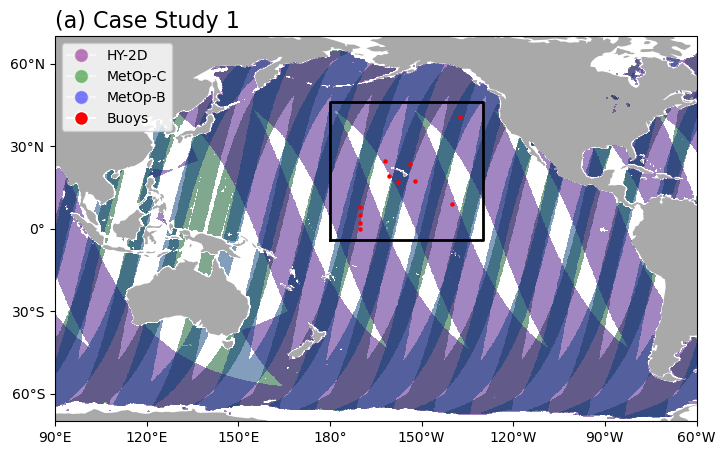

In [24]:
# 创建地图对象
fig = plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))


# 设置显示范围
ax.set_extent([90, 300, -70, 70], crs=ccrs.PlateCarree())
# 设置背景颜色
# ax.background_patch.set_facecolor('white')

# 添加陆地和海洋，设置颜色
ax.add_feature(cfeature.LAND, edgecolor='darkgrey', facecolor='darkgrey')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# 添加地形图（需要安装基于自然地理数据的库，可以从网上下载）
# ax.stock_img()

# 定义网格的间隔
lon_ticks = range(-90, 121, 30)   # 90E 到 300E，每30度一个网格
lat_ticks = range(-60, 71, 30)   # -60 到 70，每30度一个网格

# # 添加经纬度网格
# # 添加经纬度标签但不绘制网格线
# gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth = 0)  # 将linewidth设置为0以隐藏网格线
# gl.xlocator = plt.FixedLocator(lon_ticks)
# gl.ylocator = plt.FixedLocator(lat_ticks)
# gl.xformatter = LongitudeFormatter()
# gl.yformatter = LatitudeFormatter()

# gl.top_labels = False
# gl.right_labels = False

# 绘制不同的数据集
contour_hy3 = ax.contourf(lon_2d3, lat_2d3, variable_values_2d_3, cmap='Greens',levels=np.arange(0, 1.01, 0.1) ,alpha=0.5, transform=ccrs.PlateCarree())
contour_hy1 = ax.contourf(lon_2d, lat_2d, variable_values_2d_1, cmap='Purples', levels=np.arange(0, 1.01, 0.1) ,alpha=0.5, transform=ccrs.PlateCarree())
contour_hy2 = ax.contourf(lon_2d2, lat_2d2, variable_values_2d_2, cmap='Blues',levels=np.arange(0, 1.01, 0.1) , alpha=0.5, transform=ccrs.PlateCarree())


# scatter_hy =ax.scatter(lon_valid3, lat_valid3, color='purple', s=1, transform=ccrs.PlateCarree(), alpha=1)
# scatter_hscat_b=ax.scatter(lon_valid, lat_valid, color='yellow', s=1, transform=ccrs.PlateCarree(), alpha=0.1)
# scatter_hscat_c=ax.scatter(lon_valid2, lat_valid2, color='blue', s=1, transform=ccrs.PlateCarree(), alpha=0.05)




# 注意：在 [150, 200, -23, 27] 范围内绘制长方形框
rect_lon = [180, 230, 230, 180, 180]  # 经度
rect_lat = [-4, -4, 46, 46, -4]    # 纬度
ax.plot(rect_lon, rect_lat, transform=ccrs.PlateCarree(), color='black', linewidth=2)
# 显示图像
# plt.title('Simple Cartopy Example')


# 标记特定经纬度点
special_coords = [
    (9, 220),
    (0, 190), (2, 190), (5, 190), (8, 190), 
    (19.143, 199.355), (17.07, 202.245), (17.538, 207.77),(23.528, 206.208), (24.475, 197.97), (40.764, 222.623)
]

# 将 longitude 和 latitude 分开
lat, lon = zip(*special_coords)

# 使用 ax.scatter 来标注特定点
ax.scatter(lon, lat, color='red', s=5, marker='o', transform=ccrs.PlateCarree())


# 使用 matplotlib 设置刻度线
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree(central_longitude=180))
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# 设置刻度线标签样式并显示大小
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())




# 创建自定义图例标记
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='HY-2D',alpha=0.5),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='MetOp-C',alpha=0.5),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='MetOp-B',alpha=0.5),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Buoys')
]


plt.title('(a) Case Study 1',fontsize = 16,loc='left')
# 添加图例
plt.legend(handles=legend_elements, loc='upper left')





ax.set_aspect(0.9)
# plt.savefig('E:/PINN_final/part2/fig1/借个题头.eps',format='eps',bbox_inches='tight')
plt.savefig('E:/PINN2/fig1/研究区域（带条带）1.svg',format='svg',bbox_inches='tight')
plt.show()